<font size=3 color='blue'>
    
# <center> Tarea 1,  fecha de entrega: febrero 17 del 2023 </center> 

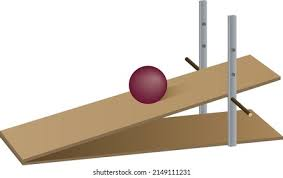

<font size=4>En esta tarea vamos a realizar el ajuste de parámetros para describir la naturaleza del plano inclinado, el cual, como físicos, sabemos que es un problema de **Movimiento Uniformemente Acelerado**. Dado un conjunto de muestras experimentales, pondrás a prueba  tu "intuición física", para determinar los valores apropiados de los pesos y el bias, para obtener el mínimo error posible dada una función F(X,$\vec{W}$, b) que propongas para describir el problema.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Definición de función para obtener los datos experimentales

In [2]:
# Esta función genera un conjunto de datos que simulan 
# la medición de la distancia de un carrito en un riel de aire
# en la ausencia de una fuerza sobre el carrito.
# Se propone un error en la medición de la distancia

def generador_datos_simple(n_points, distance_0, measuring_time, speed, acelera, max_distance_error):
    
    """
      n_points: number of point that will be generated, integer
      distance_0 : initial distantce (at time zero) 
      measuring_time: the time inteval used for the measurement
      speed : carś speed
      max_distance_error: Maximum error measuring distance
      
    """
    
    # n_points es el número de puntos que serán generados
    
    x = np.random.random(n_points) * measuring_time
     
    # x es arreglo con m numeros aleatorios entre 0.0 y measuring_time
    
    error = np.random.randn(n_points) * max_distance_error 
    
    # error es un error generado aleatoriamente con un valor maximo max_distance_error

    y = distance_0 + speed*x + acelera*x**2/2 + error 
        
    return x, y

## Declaración de parámetros de entrada para describir el sistema

In [3]:
# Generacción de las muestras (xi,yi)
n_points = 1000
distance_0 = 100.0
measure_time = 100.0
speed = 20.0
acelera= 100.0
max_distance_error = 20000

x, y = generador_datos_simple(n_points, distance_0, measure_time, speed, acelera, max_distance_error)

print("x type", type(x), "x shape", x.shape)
print("y type", type(y), "y shape", y.shape)

x type <class 'numpy.ndarray'> x shape (1000,)
y type <class 'numpy.ndarray'> y shape (1000,)


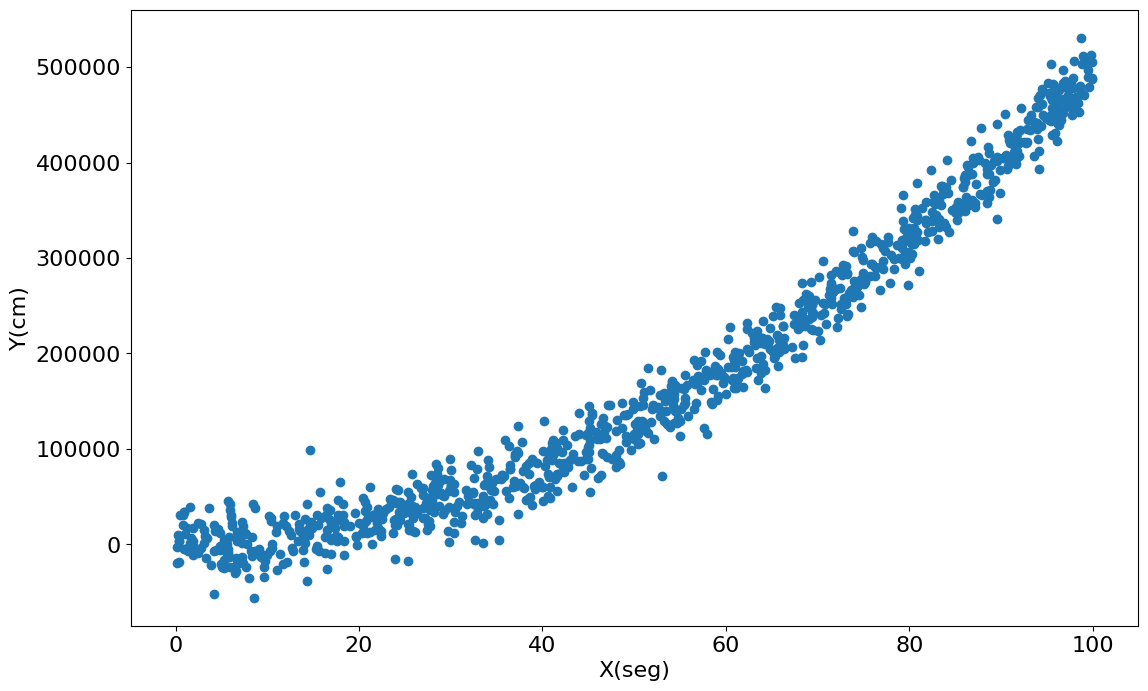

In [4]:
# Plotting y versus x

plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y(cm)', fontsize=16)
plt.xlabel('X(seg)', fontsize=16)

plt.scatter(x, y)
plt.show()

<font size=5 color='blue'>

Proponemos una función o mapeo que nos permita correlacionar los tiempos (X) con la distancia medida (Y)

$$
    F(x, W_0, W_1, b)=W_1x^2+W_0x+b
$$

<font size=4 color=red>Pregunta 1: Inicializa los valores para $W_1, W_0$ y $b$, de la manera en que tú mejor consideres. Recuerda que esto es un "guess" inicial.

In [5]:
#Initializing the parameter defining the function F

weight1_0 = 10
weight0_0= -10
bias_0 =5

<font size=4 color="blue">

Se grafica la correspondiente función $F(X,W,b)$, junto con los puntos que representan a las muestras

In [6]:
def plot_x_y_y__(x, y, y_):
    
    plt.figure(figsize=(13,8))
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('legend', fontsize=16)
    plt.ylabel('Y(cm)', fontsize=16)
    plt.xlabel('X(seg)', fontsize=16)

    plt.scatter(x, y_, color='green', lw=1, label='F(X, W1, W0, b)')
    plt.legend()

    plt.scatter(x, y)

    plt.show()

<font size=4 color=red>Pregunta 2: Utilizando la función señalada en la celda anterior, construye el arreglo de valores *y_*, los cuales representan los valores de tu función F(X,W,b). Luego, calcula el error cuadrático medio de dicho arreglo con los valores del experimento, *y*. Imprime el resultado y la gráfica

residuo: 36459687287.07


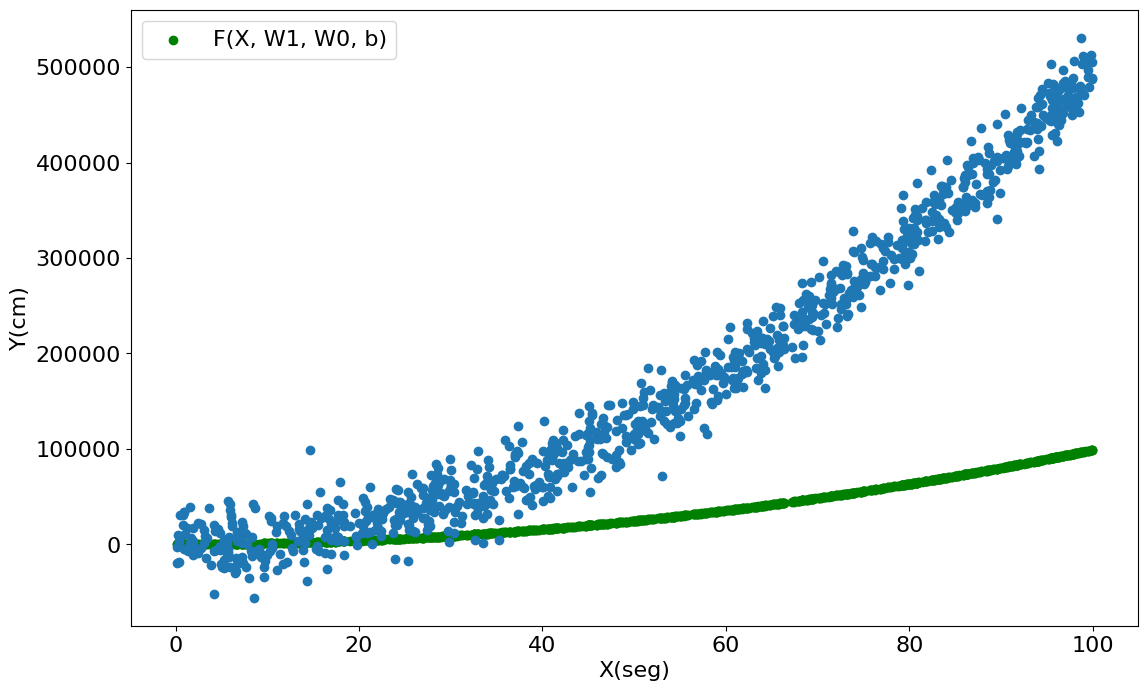

In [7]:
y_ = weight1_0 * x**2 + weight0_0 * x + bias_0

residuo = np.mean((y-y_)**2)

print('residuo: {0:10.2f}'.format(residuo))

plot_x_y_y__(x, y, y_)

<font size=4 color=red>Pregunta 3: Define una función, que se llame **update_weights_biases**, la cual permita actualizar los parámetros $W_1, W_0$ y $b$, dando una delta $\Delta$ de cambio para cada uno de ellos. (HINT: Revisa la función que se definió en la clase 2. No la puedes copiar completamente; debes realizar ciertos ajutes a esa función para este nuevo problema)

In [8]:
def update_weights_biases(x, y, weight1, weight0, bias, delta_weight1, delta_weight0, delta_bias):
    
    weight1 = weight1 + delta_weight1
    
    weight0 = weight0 + delta_weight0
    
    bias = bias + delta_bias
    
    y_ = weight1 * x**2 + weight0 * x + bias
       
    mse = np.mean((y - y_)**2)
        
    return weight1, weight0, bias, y_, mse

<font size=4 color=red>Pregunta 4: Realiza una gráfica, actualizando los valores de los pesos y los bias, con el delta de cambio que tú consideres, para los 3 parámetros involucrados. Utiliza la función *plot_x_y_y__* para mostrar el resultado

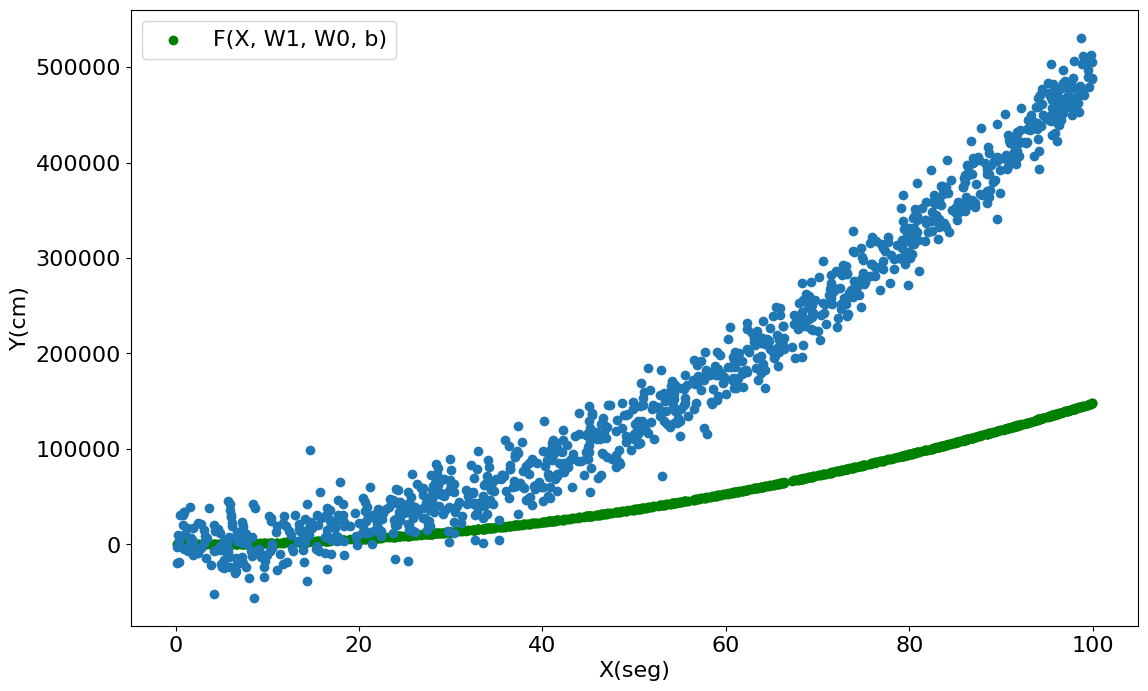

In [9]:
weight1 = weight1_0
weight0 = weight0_0
bias = bias_0
delta_w1 = 5
delta_w0 = -10
delta_b = .01

weight1, weight0, bias, y_, mse = update_weights_biases(x, y , weight1, weight0, bias, delta_w1, delta_w0, delta_b)
plot_x_y_y__(x, y, y_) 

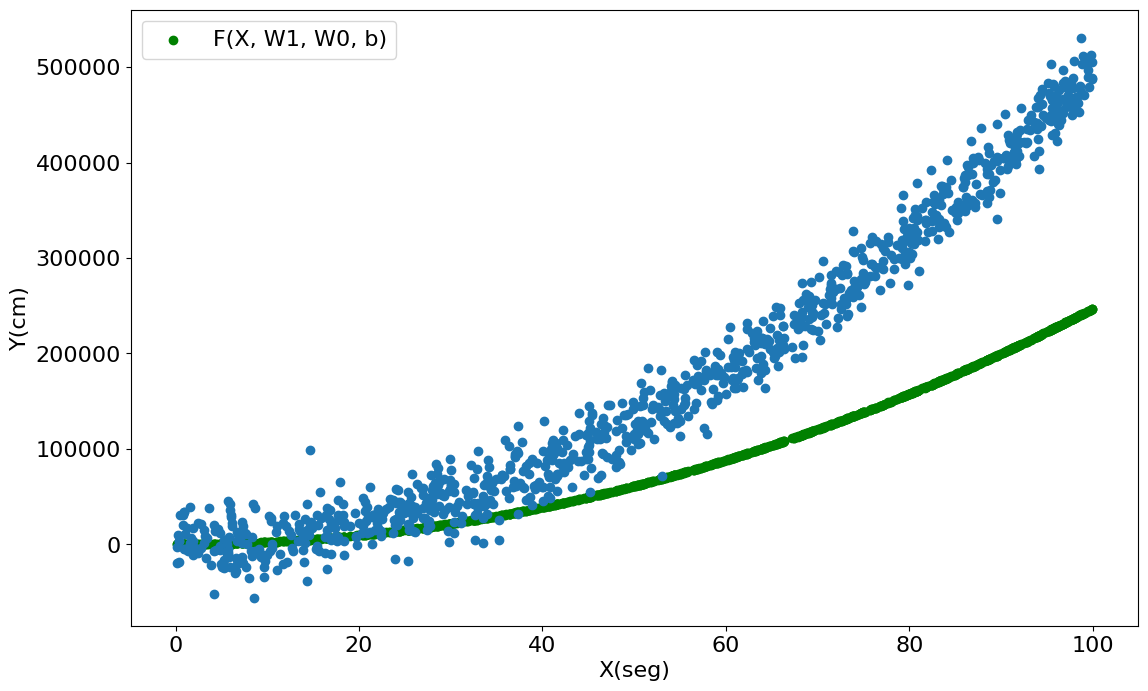

In [10]:
weight1 = weight1
weight0 = weight0
bias = bias
delta_w1 = 10
delta_w0 = -10
delta_b = .1

weight1, weight0, bias, y_, mse = update_weights_biases(x, y , weight1, weight0, bias, delta_w1, delta_w0, delta_b)
plot_x_y_y__(x, y, y_) 

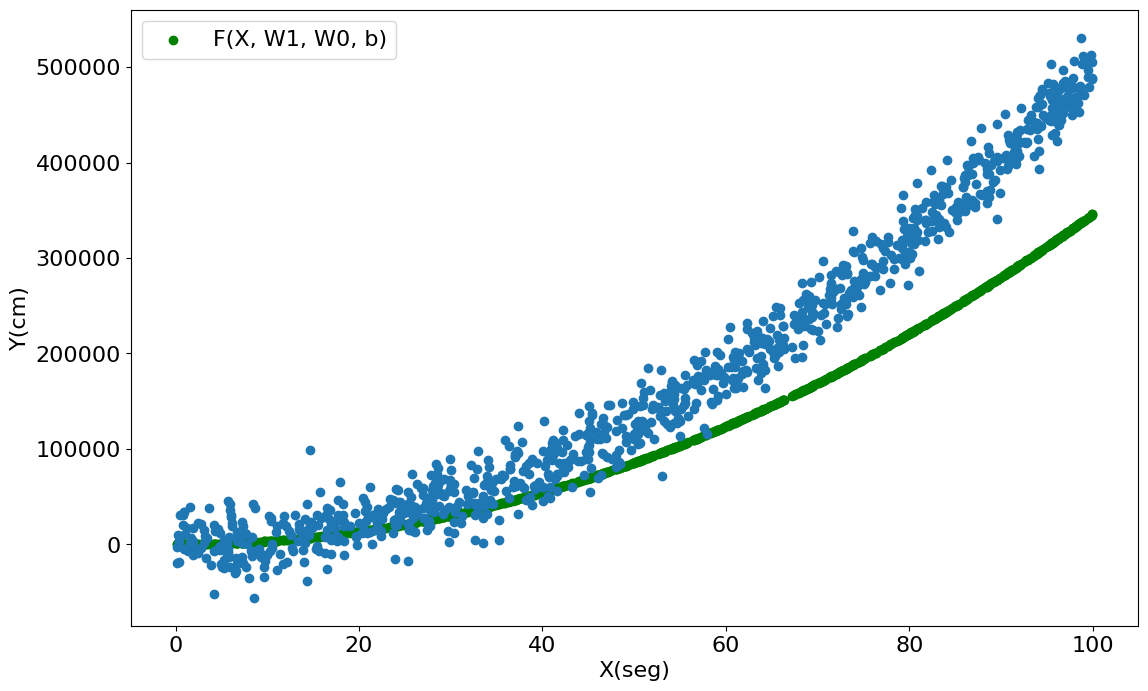

In [11]:
weight1 = weight1
weight0 = weight0
bias = bias
delta_w1 = 10
delta_w0 = -10
delta_b = 10

weight1, weight0, bias, y_, mse = update_weights_biases(x, y , weight1, weight0, bias, delta_w1, delta_w0, delta_b)
plot_x_y_y__(x, y, y_) 

<font size=4 color=red>Pregunta 5: Construye un ciclo *for*, el cual realizará 120 veces la actualización de los parámetros de tu función F(X,W,b). Comienza con la actualización del parámetros $W_1$; define un cambio para este parámetro mencionado, y deja en 0 las deltas de los demás. Imprime el resultado de los pesos, el bias y el error MSE para cada 10 iteraciones. Los resultados de tus actualizaciones los debes guardar en una variable, que se va a llamar **update_outputs**, la cual será una lista, cuyos elementos también serán listas, que contienen a su vez, en el orden indicado, $W_1$, $W_0$, bias, **y_** y el error MSE

In [12]:
update_outputs = []

weight1 = weight1_0
weight0 = weight0_0
bias = -3
delta_w1 = 0.7
delta_w0 = 0
delta_b = 0
iterations = 120

for i in range(iterations):
    
    weight1, weight0, bias, y_, mse = update_weights_biases(x, y, weight1, weight0, bias, delta_w1, delta_w0, delta_b)
                            
    update_outputs.append([weight1, weight0, bias, y_, mse])
    
    if i % 10 == 0 :
            print('weight1: {0:8.2f}   weight0: {1:8.2f}   bias: {2:5.2f}   MSE: {3:10.2f}'.format(weight1, weight0, bias, mse))


weight1:    10.70   weight0:   -10.00   bias: -3.00   MSE: 35218458480.99
weight1:    17.70   weight0:   -10.00   bias: -3.00   MSE: 23983007441.41
weight1:    24.70   weight0:   -10.00   bias: -3.00   MSE: 14929262455.62
weight1:    31.70   weight0:   -10.00   bias: -3.00   MSE: 8057223523.63
weight1:    38.70   weight0:   -10.00   bias: -3.00   MSE: 3366890645.43
weight1:    45.70   weight0:   -10.00   bias: -3.00   MSE: 858263821.03
weight1:    52.70   weight0:   -10.00   bias: -3.00   MSE: 531343050.42
weight1:    59.70   weight0:   -10.00   bias: -3.00   MSE: 2386128333.61
weight1:    66.70   weight0:   -10.00   bias: -3.00   MSE: 6422619670.59
weight1:    73.70   weight0:   -10.00   bias: -3.00   MSE: 12640817061.37
weight1:    80.70   weight0:   -10.00   bias: -3.00   MSE: 21040720505.93
weight1:    87.70   weight0:   -10.00   bias: -3.00   MSE: 31622330004.30


In [13]:
update_outputs_weight = update_outputs

<font size=4 color=red>Pregunta 6: Realiza las gráficas para algunos de los parámetros que actualizaste y guardaste en la lista **update_outputs**. Puedes realizar el mismo ciclo *for* que señalamos en la notebook de la clase 2

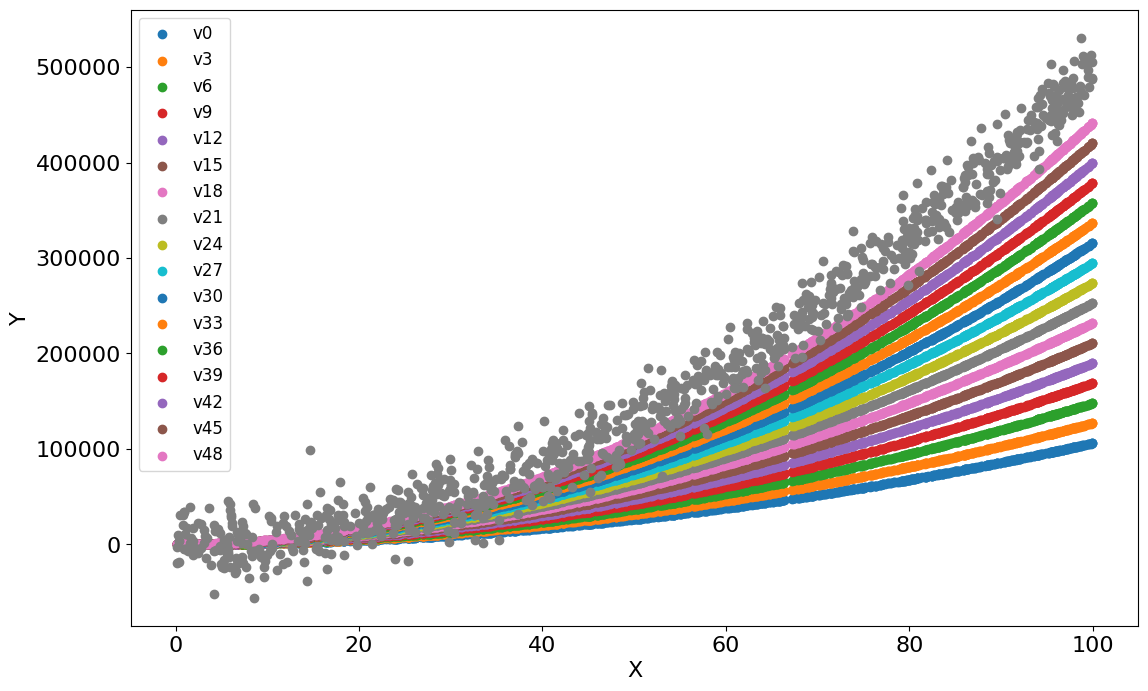

In [14]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

for i in range(0,50,3):

    plt.scatter(x, update_outputs[i][0]*(x**2) + update_outputs[i][1]*x + update_outputs[i][2], label='v' + str(i), lw=1)
    plt.legend()

plt.scatter(x, y)

plt.show()

<font size=4 color=red> Pregunta 7: Realiza la gráfica de $W_1$ vs MSE. (HINT: Declara una lista vacía en la que guardes los pesos W1, y otra donde guardes los errores MSE. Estas listas las vas a ir llenando con los valores que guardaste en **update_outputs**. Revisa la clase 2 para que veas cómo se realiza este proceso. Ten cuidado con los índices)

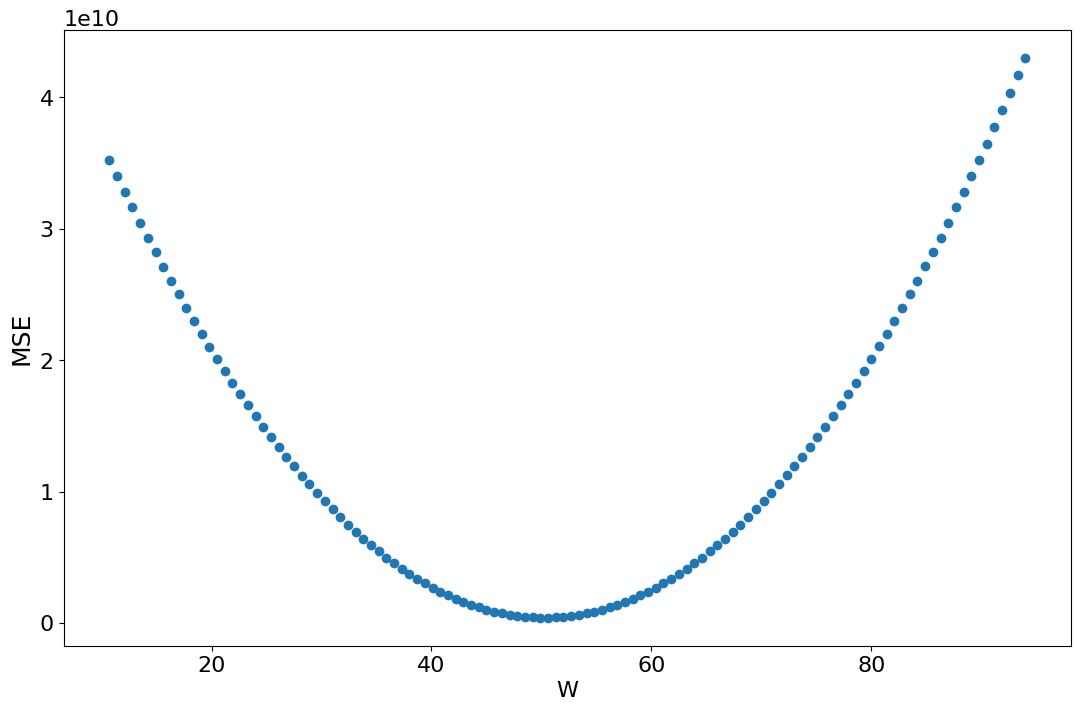

In [15]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('W', fontsize=16)

weights1 = []

mse = []

for update_output in update_outputs:
    
    weights1.append(update_output[0])
    
    mse.append(update_output[4])

plt.scatter(weights1, mse)

plt.show()

<font size=4 color=red> Pregunta 8: Señala el error más bajo obtenido, así como los mejores parámetros que llevan a este resultado del error mínimo

In [16]:
index_min = np.argmin(mse)

print('El MSE mas pequeño tiene el valor: {:10.2f}'.format(update_outputs[index_min][4]))

w1_opt = update_outputs[index_min][0]
w0_opt = update_outputs[index_min][1]
b_opt = update_outputs[index_min][2]

print('Los valores optimos de los parámetros son W1 = {0:5.2f}, W0 = {1:5.2f} y b = {2:5.2f} ' \
      .format(w1_opt, w0_opt, b_opt))

El MSE mas pequeño tiene el valor: 400306632.21
Los valores optimos de los parámetros son W1 = 49.90, W0 = -10.00 y b = -3.00 


<font size=4 color=red>Pregunta 9: Realiza los mismos procedimientos que desarrollaste en las preguntas 5 a la 8, pero ahora actualizando el valor $W_0$

In [17]:
update_outputs = []

weight1 = w1_opt
weight0 = w0_opt
bias = b_opt
delta_w1 = 0
delta_w0 = -1.2
delta_b = 0
iterations = 120

for i in range(iterations):
    
    weight1, weight0, bias, y_, mse = update_weights_biases(x, y, weight1, weight0, bias, delta_w1, delta_w0, delta_b)
                            
    update_outputs.append([weight1, weight0, bias, y_, mse])
    
    if i % 10 == 0 :
            print('weight1: {0:8.2f}   weight0: {1:8.2f}   bias: {2:5.2f}   MSE: {3:10.2f}'.format(weight1, weight0, bias, mse))


weight1:    49.90   weight0:   -11.20   bias: -3.00   MSE: 400583784.42
weight1:    49.90   weight0:   -23.20   bias: -3.00   MSE: 403920603.77
weight1:    49.90   weight0:   -35.20   bias: -3.00   MSE: 408285236.29
weight1:    49.90   weight0:   -47.20   bias: -3.00   MSE: 413677681.99
weight1:    49.90   weight0:   -59.20   bias: -3.00   MSE: 420097940.86
weight1:    49.90   weight0:   -71.20   bias: -3.00   MSE: 427546012.91
weight1:    49.90   weight0:   -83.20   bias: -3.00   MSE: 436021898.13
weight1:    49.90   weight0:   -95.20   bias: -3.00   MSE: 445525596.52
weight1:    49.90   weight0:  -107.20   bias: -3.00   MSE: 456057108.10
weight1:    49.90   weight0:  -119.20   bias: -3.00   MSE: 467616432.84
weight1:    49.90   weight0:  -131.20   bias: -3.00   MSE: 480203570.76
weight1:    49.90   weight0:  -143.20   bias: -3.00   MSE: 493818521.86


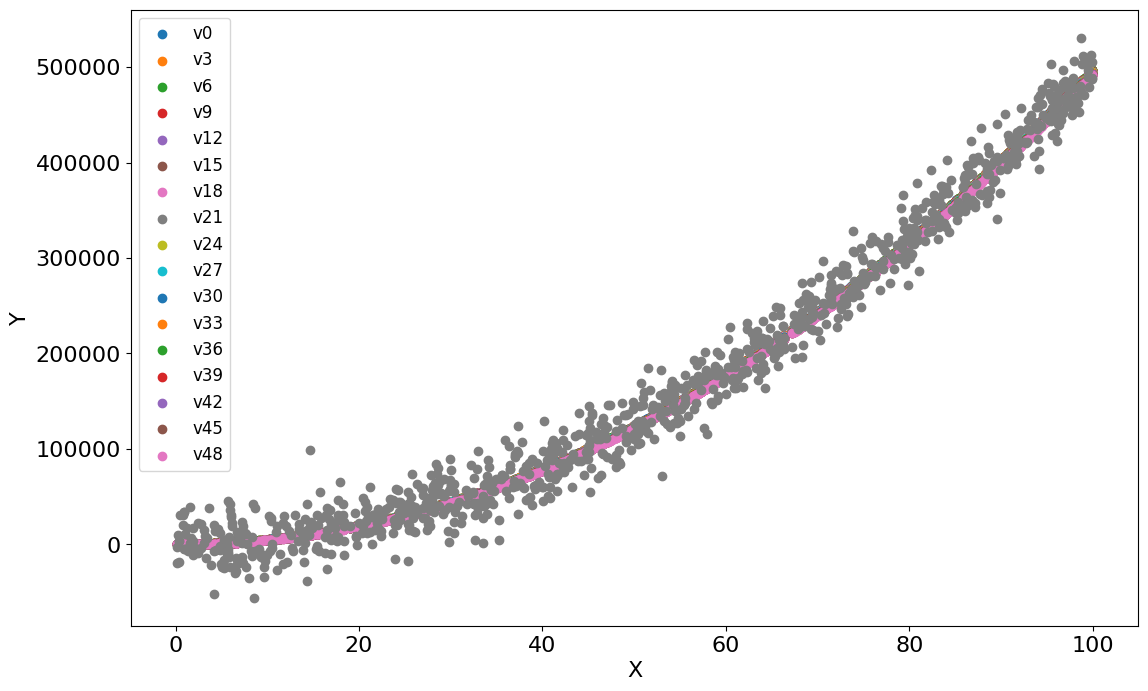

In [18]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

for i in range(0,50,3):

    plt.scatter(x, w1_opt*(x**2) + update_outputs[i][1]*x + update_outputs[i][2], label='v' + str(i), lw=1)
    plt.legend()

plt.scatter(x, y)

plt.show()

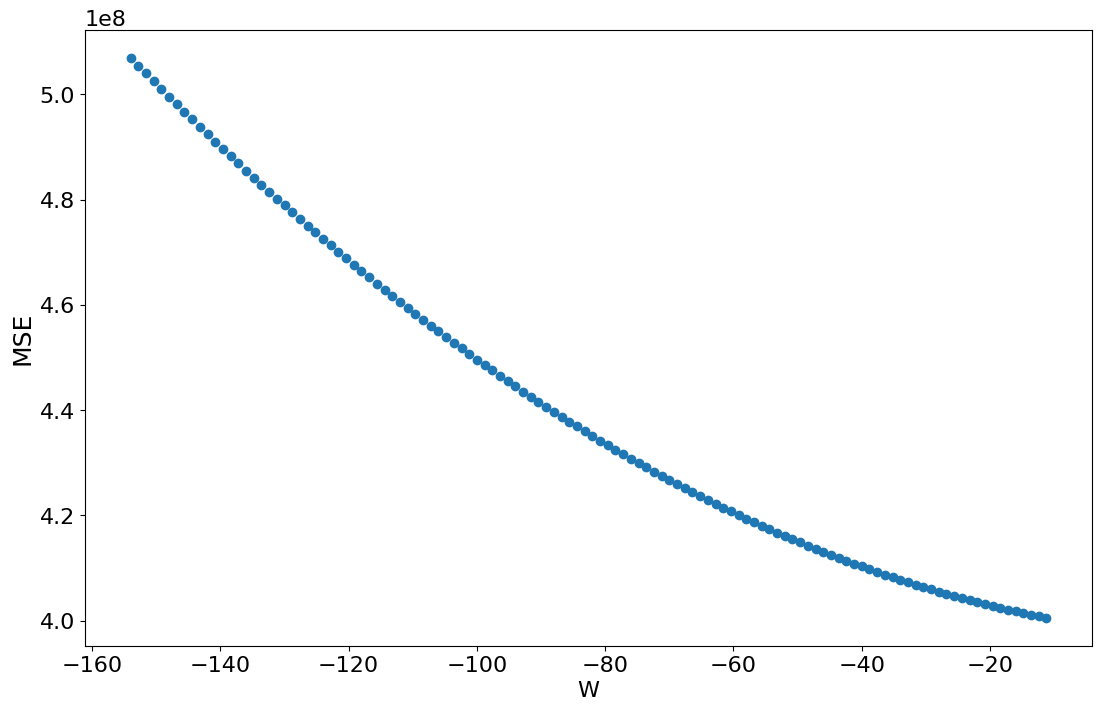

In [19]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('W', fontsize=16)

weights0 = []

mse = []

for update_output in update_outputs:
    
    weights0.append(update_output[1])
    
    mse.append(update_output[4])

plt.scatter(weights0, mse)

plt.show()

In [20]:
index_min = np.argmin(mse)

print('El MSE mas pequeño tiene el valor: {:10.2f}'.format(update_outputs[index_min][4]))

w1_opt = update_outputs[index_min][0]
w0_opt = update_outputs[index_min][1]
b_opt = update_outputs[index_min][2]

print('Los valores optimos de los parámetros son W1 = {0:5.2f}, W0 = {1:5.2f} y b = {2:5.2f} ' \
      .format(w1_opt, w0_opt, b_opt))

El MSE mas pequeño tiene el valor: 400583784.42
Los valores optimos de los parámetros son W1 = 49.90, W0 = -11.20 y b = -3.00 


<font size=4 color=red> Pregunta 10: Repite los pasos marcados en la pregunta 9, pero ahora para actualiza el valor de bias

In [21]:
update_outputs = []

weight1 = w1_opt
weight0 = w0_opt
bias = b_opt
delta_w1 = 0
delta_w0 = 0
delta_b = 10
iterations = 120

for i in range(iterations):
    
    weight1, weight0, bias, y_, mse = update_weights_biases(x, y, weight1, weight0, bias, delta_w1, delta_w0, delta_b)
                            
    update_outputs.append([weight1, weight0, bias, y_, mse])
    
    if i % 10 == 0 :
            print('weight1: {0:8.2f}   weight0: {1:8.2f}   bias: {2:5.2f}   MSE: {3:10.2f}'.format(weight1, weight0, bias, mse))


weight1:    49.90   weight0:   -11.20   bias:  7.00   MSE: 400542790.14
weight1:    49.90   weight0:   -11.20   bias: 107.00   MSE: 400143847.35
weight1:    49.90   weight0:   -11.20   bias: 207.00   MSE: 399764904.56
weight1:    49.90   weight0:   -11.20   bias: 307.00   MSE: 399405961.77
weight1:    49.90   weight0:   -11.20   bias: 407.00   MSE: 399067018.97
weight1:    49.90   weight0:   -11.20   bias: 507.00   MSE: 398748076.18
weight1:    49.90   weight0:   -11.20   bias: 607.00   MSE: 398449133.39
weight1:    49.90   weight0:   -11.20   bias: 707.00   MSE: 398170190.60
weight1:    49.90   weight0:   -11.20   bias: 807.00   MSE: 397911247.81
weight1:    49.90   weight0:   -11.20   bias: 907.00   MSE: 397672305.01
weight1:    49.90   weight0:   -11.20   bias: 1007.00   MSE: 397453362.22
weight1:    49.90   weight0:   -11.20   bias: 1107.00   MSE: 397254419.43


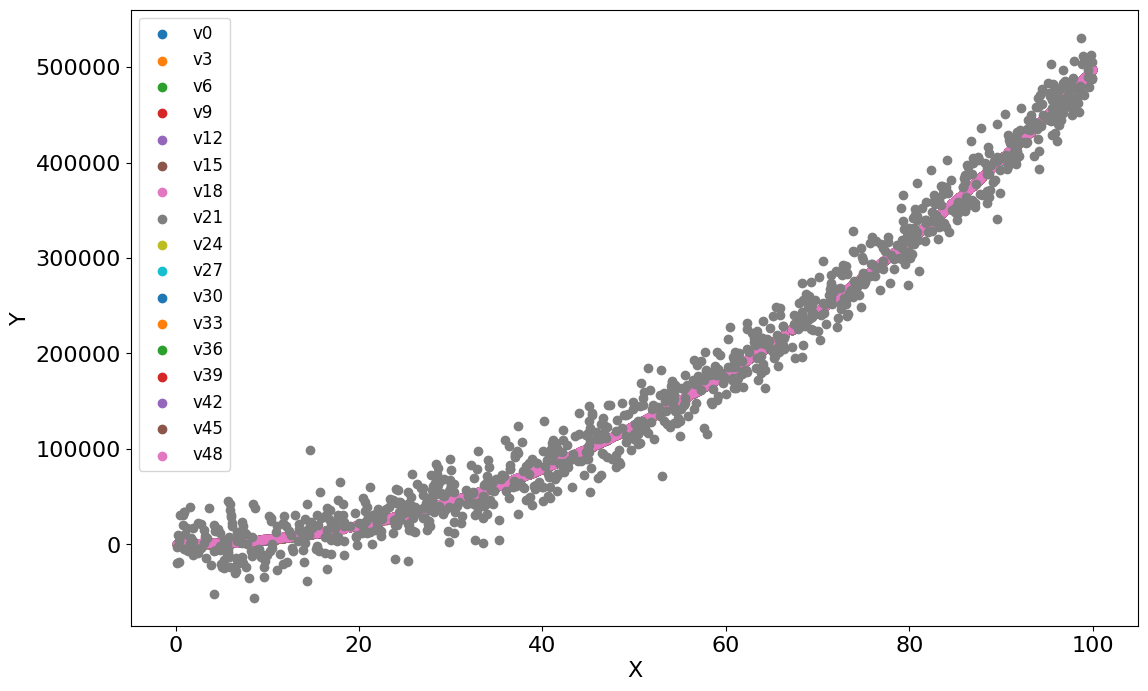

In [22]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

for i in range(0,50,3):

    plt.scatter(x, w1_opt*(x**2) + w0_opt*x + update_outputs[i][2], label='v' + str(i), lw=1)
    plt.legend()

plt.scatter(x, y)

plt.show()

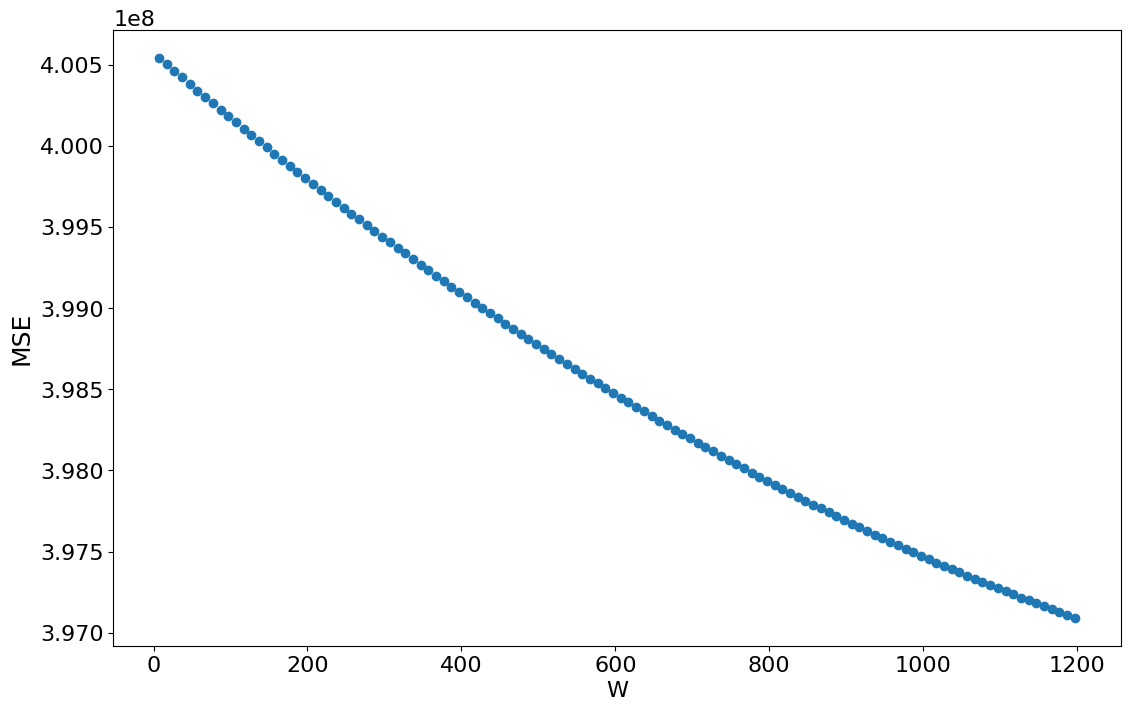

In [23]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('W', fontsize=16)

bias = []

mse = []

for update_output in update_outputs:
    
    bias.append(update_output[2])
    
    mse.append(update_output[4])

plt.scatter(bias, mse)

plt.show()

In [24]:
index_min = np.argmin(mse)

print('El MSE mas pequeño tiene el valor: {:10.2f}'.format(update_outputs[index_min][4]))

w1_opt = update_outputs[index_min][0]
w0_opt = update_outputs[index_min][1]
b_opt = update_outputs[index_min][2]

print('Los valores optimos de los parámetros son W1 = {0:5.2f}, W0 = {1:5.2f} y b = {2:5.2f} ' \
      .format(w1_opt, w0_opt, b_opt))

El MSE mas pequeño tiene el valor: 397092470.92
Los valores optimos de los parámetros son W1 = 49.90, W0 = -11.20 y b = 1197.00 


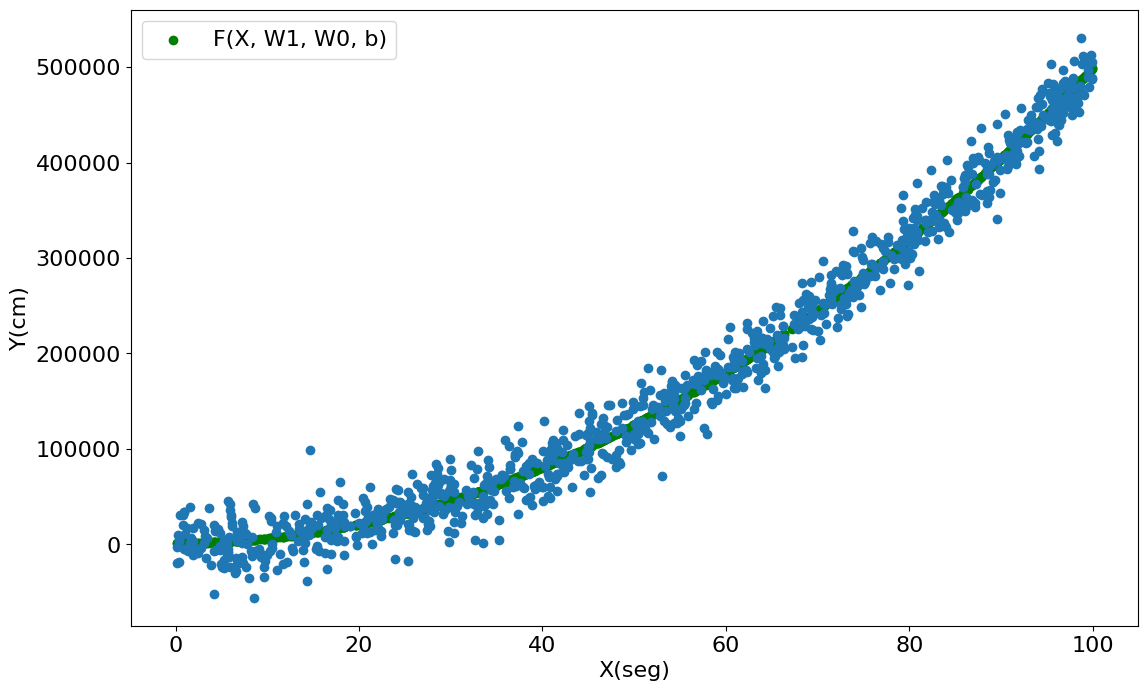

In [25]:
y_ = w1_opt*(x**2) + w0_opt*x + b_opt
y_hand = y_

plot_x_y_y__(x, y, y_)

<font size=4 color=red>Pregunta Extra: ¿Qué representa físicamente el valor $W_1$? ¿El ajuste que realizaste se acerca al valor que se indica como referencia? ¿Por qué? 

In [26]:
�
1
W 
1
​
  estaría relacionado con la componente cuadrática (
�
2
x 
2
 ) y podría interpretarse como la aceleración debido al plano inclinado.

SyntaxError: invalid character '�' (U+FFFD) (2623729727.py, line 1)

In [27]:
def mean_square_error(x, y):
    # Convierte x e y a arreglos numpy
    x = np.array(x)
    y = np.array(y)

    # 1) Se obtiene el promedio de los valores x_i y y_i
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # 2) se calcula (x_i-x) y (y_i-y), con x e y los promedios de x_i e y_i, respectivamente.
    x_i = x - mean_x
    y_i = y - mean_y

    # 3) se calcula (x_i-x)*(x_i-x)
    x_i2 = np.power(x_i, 2)

    # 4) se hacen las sumas correspondientes
    xy_sum = np.sum(x_i * y_i)
    x2_sum = np.sum(x_i2)

    # Se definen a w0, w1 y b
    w1 = xy_sum / x2_sum
    w0 = mean_y - w1 * mean_x
    b = np.mean(y) - w1 * np.mean(x**2) - w0 * np.mean(x)

    return w1, w0, b


In [28]:
w1_opt_mse, w0_opt_mse, b_opt_mse = mean_square_error(x, y)

print(" w1_opt = {0:5.2f}, w0_opt = {1:5.2f}, b_opt = {2:5.2f}".format(w1_opt_mse, w0_opt_mse, b_opt_mse))

 w1_opt = 5099.50, w0_opt = -85993.49, b_opt = -13541595.31


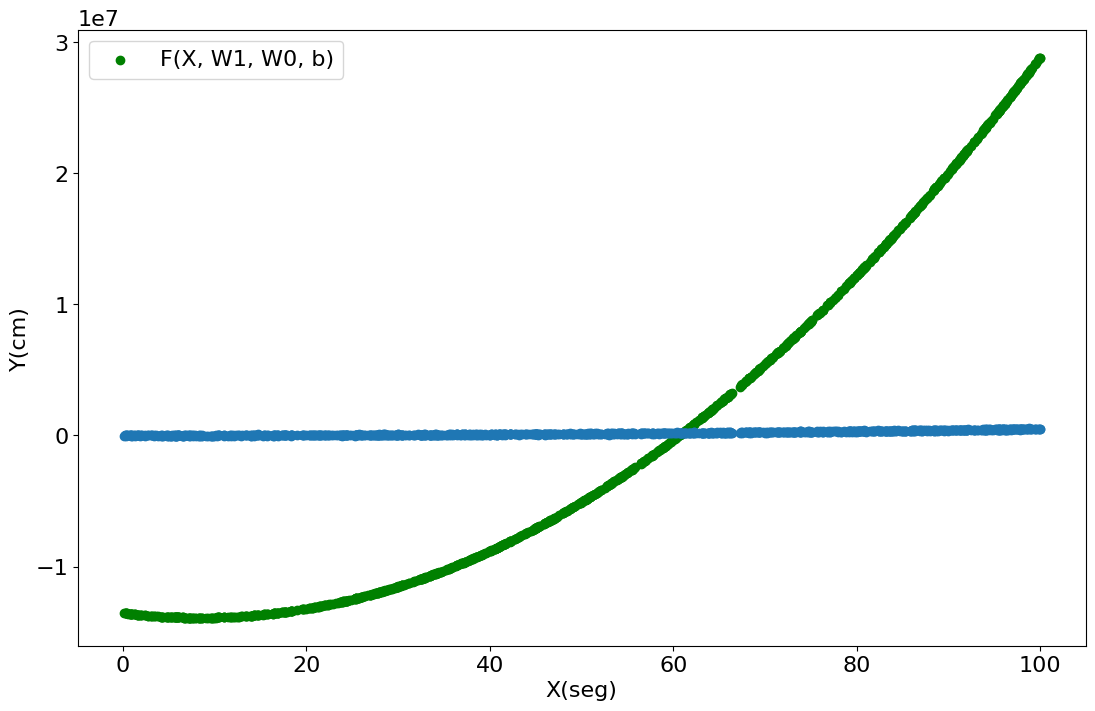

In [29]:
y_ = w1_opt_mse*x**2 + w0_opt_mse*x + b_opt_mse

plot_x_y_y__(x, y, y_)

In [30]:
minimal_MSE = np.mean((y-w1_opt_mse*x**2 + w0_opt_mse*x + b_opt_mse)**2)
print('MSE mínimo: {0:10.2f}'.format(minimal_MSE))

MSE mínimo: 1624113816916197.50
